<a href="https://colab.research.google.com/github/angel870326/Hierarchical-Clustering/blob/main/newtaipei_wordcloud_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2022.04.24 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

#**Word Cloud Generated from Tf-idf for Clusters (New Taipei)**



####**Contents:**

1. Read file with clustering results
2. Tf-idf vectorizer
3. Create a dataframe for each clustering method
4. Method 1: Calculate average tf-idf for each cluster (straightforward method)
5. Method 2: Regard each cluster as a document and recalculate tf-idf for each term
6. Word Cloud

<br/>

##**1. Read file with clustering results**

---



In [1]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
cluster_result = pd.read_csv('/content/gdrive/My Drive/碩一下/Capstone/hierarchical_clustering/taipei/hierarchical_textcluster_pca_newtaipei_r.csv')

In [3]:
# cluster size
cluster_method_name = ['cluster_complete_3', 'cluster_complete_4', 'cluster_avg_3', 'cluster_avg_4', 'cluster_ward_3', 'cluster_ward_4']
clusterSizeDf = pd.DataFrame({'cluster':list('1234')})
for i in cluster_method_name:
  c = cluster_result[['c0101', i]].groupby(i).count().reset_index(i)
  clusterSizeDf[i] = c[['c0101']]

clusterSizeDf

,cluster,cluster_complete_3,cluster_complete_4,cluster_avg_3,cluster_avg_4,cluster_ward_3,cluster_ward_4
0,1,1114.0,1114,1505.0,1505,885.0,885
1,2,2422.0,2422,1052.0,1052,1059.0,1059
2,3,1515.0,392,2494.0,773,3107.0,1208
3,4,NaN,1123,NaN,1721,NaN,1899


##**2. Tf-idf vectorizer**


---


In [4]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# text contents in dataframe to array
contents = np.array(cluster_result['content']) 
contents

# tfidf vectorizer
vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b') 
tfidf_matrix = vectorizer.fit_transform(contents)

# See all terms
terms = vectorizer.get_feature_names_out()
print("Terms: ",terms)

# Store vectorized texts in df
cluster_result['tfidf'] = list(tfidf_matrix.toarray())
cluster_result

Terms:  ['24小時' '一般' '三十一年至三十五年屋齡' '三十六年至四十年屋齡' '中公設比' '二十ㄧ年至二十五年屋齡' '二十六年至三十年屋齡'
 '五年內屋齡' '六年至十年屋齡' '其他管理形式' '北' '十一年至十五年屋齡' '十六年至二十年屋齡' '南' '四十年以上屋齡'
 '多戶數' '多方位' '夜間管理' '大公設比' '小公設比' '少戶數' '日間管理' '有平面車位' '有機械車位' '東' '東北'
 '東南' '極多戶數' '極少戶數' '無平面車位' '無機械車位' '無管理' '臨單線道' '臨多線道' '臨雙線道' '西' '西北'
 '西南' '近一年有實價登錄' '近一年無實價登錄' '重點']


,c0101,content,tfidf,cluster_complete_3,cluster_complete_4,cluster_avg_3,cluster_avg_4,cluster_ward_3,cluster_ward_4
0,0000001,"西南,24小時,重點,三十一年至三十五年屋齡,少戶數,小公設比,近一年有實價登錄,臨單線道,...","[0.19409651028806937, 0.0, 0.5513114251178683,...",3,4,1,1,3,4
1,0000008,"西南,24小時,一般,二十六年至三十年屋齡,少戶數,中公設比,近一年無實價登錄,臨單線道,有...","[0.21338676564047013, 0.2635384006677394, 0.0,...",2,2,3,3,3,3
2,0000010,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,小公設比,近一年有實價登錄,臨雙線道,...","[0.17187360943267946, 0.0, 0.0, 0.0, 0.0, 0.0,...",2,2,3,4,3,3
3,0000011,"西南,日間管理,一般,二十六年至三十年屋齡,少戶數,中公設比,近一年有實價登錄,臨單線道,無...","[0.0, 0.24183468315603604, 0.0, 0.0, 0.2758529...",3,3,3,3,3,3
4,0000012,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,中公設比,近一年無實價登錄,臨多線道,...","[0.16880843113923513, 0.0, 0.0, 0.0, 0.2378096...",2,2,3,4,3,3
...,...,...,...,...,...,...,...,...,...
5046,Y001224,"東,24小時,一般,十一年至十五年屋齡,極少戶數,中公設比,近一年有實價登錄,臨單線道,有平...","[0.20791315500749788, 0.2567783441676944, 0.0,...",2,2,1,1,1,1
5047,Y001227,"一般,二十六年至三十年屋齡,極多戶數,中公設比,近一年有實價登錄,有平面車位,無機械車位","[0.0, 0.3248263932293996, 0.0, 0.0, 0.37051885...",2,2,3,4,3,3
5048,Y001233,"東北,24小時,一般,十一年至十五年屋齡,極少戶數,中公設比,近一年有實價登錄,臨單線道,有...","[0.21064310740279427, 0.2601499088755435, 0.0,...",3,4,1,1,1,1
5049,Y001237,"東北,24小時,一般,十一年至十五年屋齡,極少戶數,中公設比,近一年有實價登錄,臨單線道,有...","[0.21064310740279427, 0.2601499088755435, 0.0,...",3,4,1,1,1,1


##**3. Create a dataframe for each clustering method**


---


In [5]:
cluster_complete_3 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_complete_3']]
cluster_complete_4 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_complete_4']]
cluster_avg_3 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_avg_3']]
cluster_avg_4 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_avg_4']]
cluster_ward_3 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_ward_3']]
cluster_ward_4 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_ward_4']]

cluster_complete_3

,c0101,content,tfidf,cluster_complete_3
0,0000001,"西南,24小時,重點,三十一年至三十五年屋齡,少戶數,小公設比,近一年有實價登錄,臨單線道,...","[0.19409651028806937, 0.0, 0.5513114251178683,...",3
1,0000008,"西南,24小時,一般,二十六年至三十年屋齡,少戶數,中公設比,近一年無實價登錄,臨單線道,有...","[0.21338676564047013, 0.2635384006677394, 0.0,...",2
2,0000010,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,小公設比,近一年有實價登錄,臨雙線道,...","[0.17187360943267946, 0.0, 0.0, 0.0, 0.0, 0.0,...",2
3,0000011,"西南,日間管理,一般,二十六年至三十年屋齡,少戶數,中公設比,近一年有實價登錄,臨單線道,無...","[0.0, 0.24183468315603604, 0.0, 0.0, 0.2758529...",3
4,0000012,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,中公設比,近一年無實價登錄,臨多線道,...","[0.16880843113923513, 0.0, 0.0, 0.0, 0.2378096...",2
...,...,...,...,...
5046,Y001224,"東,24小時,一般,十一年至十五年屋齡,極少戶數,中公設比,近一年有實價登錄,臨單線道,有平...","[0.20791315500749788, 0.2567783441676944, 0.0,...",2
5047,Y001227,"一般,二十六年至三十年屋齡,極多戶數,中公設比,近一年有實價登錄,有平面車位,無機械車位","[0.0, 0.3248263932293996, 0.0, 0.0, 0.37051885...",2
5048,Y001233,"東北,24小時,一般,十一年至十五年屋齡,極少戶數,中公設比,近一年有實價登錄,臨單線道,有...","[0.21064310740279427, 0.2601499088755435, 0.0,...",3
5049,Y001237,"東北,24小時,一般,十一年至十五年屋齡,極少戶數,中公設比,近一年有實價登錄,臨單線道,有...","[0.21064310740279427, 0.2601499088755435, 0.0,...",3


##**4. Method 1: Calculate average tf-idf for each cluster (straightforward method)**

*   Regard each observation as a document and calculate tf-idf for each term (just like what we do in [text clustering](https://github.com/angel870326/Hierarchical-Clustering/blob/main/newtaipei_pca_hierarchical_text.ipynb))

*   Calculate average tf-idf for each cluster


In [6]:
# Build a dataframe for a cluster 
def clusterdf(method,column,clusterID):
  return method[method[column] == clusterID]

# Calculate average tfidf for a cluster
def avgTfidf(clusterdf):
  return clusterdf['tfidf'].to_numpy().mean(axis=0)

# Store feature weights for clusters
cluster_feature_weight_1 = pd.DataFrame(terms, columns=['feature']) 
def clusterFeatureWeight(clusterType,clusterResult,clusterSize):
  for i in range(1,clusterSize+1):
    cluster = clusterdf(clusterResult,clusterType,i)
    cluster_feature_weight_1['%s_%d'%(clusterType[8:],i)] = pd.DataFrame(avgTfidf(cluster))

In [7]:
clusterFeatureWeight('cluster_complete_3',cluster_complete_3,3)
clusterFeatureWeight('cluster_complete_4',cluster_complete_4,4)
clusterFeatureWeight('cluster_avg_3',cluster_avg_3,3)
clusterFeatureWeight('cluster_avg_4',cluster_avg_4,4)
clusterFeatureWeight('cluster_ward_3',cluster_ward_3,3)
clusterFeatureWeight('cluster_ward_4',cluster_ward_4,4)

cluster_feature_weight_1

,feature,complete_3_1,complete_3_2,complete_3_3,complete_4_1,complete_4_2,complete_4_3,complete_4_4,avg_3_1,avg_3_2,...,avg_4_2,avg_4_3,avg_4_4,ward_3_1,ward_3_2,ward_3_3,ward_4_1,ward_4_2,ward_4_3,ward_4_4
0,24小時,0.028427,0.196921,0.152710,0.028427,0.196921,0.158987,0.150519,0.069663,0.145474,...,0.145474,0.188324,0.195532,0.047958,0.146053,0.174719,0.047958,0.146053,0.160989,0.183454
1,一般,0.227897,0.062560,0.177670,0.227897,0.062560,0.197737,0.170666,0.212830,0.132985,...,0.132985,0.142841,0.060396,0.220112,0.133412,0.108943,0.220112,0.133412,0.138645,0.090049
2,三十一年至三十五年屋齡,0.046467,0.017238,0.046692,0.046467,0.017238,0.001284,0.062542,0.102885,0.000000,...,0.000000,0.000651,0.005177,0.048884,0.000473,0.038780,0.048884,0.000473,0.001645,0.062403
3,三十六年至四十年屋齡,0.002755,0.000856,0.011755,0.002755,0.000856,0.016156,0.010219,0.013406,0.000000,...,0.000000,0.001824,0.000793,0.002646,0.000000,0.006633,0.002646,0.000000,0.009395,0.004877
4,中公設比,0.095360,0.147385,0.081276,0.095360,0.147385,0.074106,0.083778,0.105161,0.048328,...,0.048328,0.091248,0.178202,0.128090,0.049302,0.135423,0.128090,0.049302,0.093952,0.161803
5,二十ㄧ年至二十五年屋齡,0.082848,0.075808,0.045426,0.082848,0.075808,0.001004,0.060932,0.066993,0.000345,...,0.000345,0.000509,0.141277,0.080422,0.000692,0.087806,0.080422,0.000692,0.000326,0.143454
6,二十六年至三十年屋齡,0.100682,0.095901,0.099514,0.100682,0.095901,0.366683,0.006255,0.083755,0.000000,...,0.000000,0.373056,0.046934,0.064015,0.000987,0.140810,0.064015,0.000987,0.359116,0.001941
7,五年內屋齡,0.017586,0.000641,0.124891,0.017586,0.000641,0.000000,0.168486,0.000585,0.197733,...,0.197733,0.000000,0.000848,0.000000,0.195164,0.001183,0.000000,0.195164,0.000000,0.001936
8,六年至十年屋齡,0.066445,0.072372,0.051420,0.066445,0.072372,0.000000,0.069369,0.000000,0.308085,...,0.308085,0.000000,0.001802,0.000000,0.307754,0.000417,0.000000,0.307754,0.000000,0.000682
9,其他管理形式,0.004397,0.004069,0.008089,0.004397,0.004069,0.003682,0.009628,0.004589,0.013295,...,0.013295,0.004589,0.001493,0.006408,0.013207,0.002366,0.006408,0.013207,0.002936,0.002004


##**5. Method 2: Regard each cluster as a document and recalculate tf-idf for each term**




In [8]:
# Group contents(row) in the same cluster(column value)
def groupClusterContents(clusterType,clusterResult):
  return clusterResult.groupby(clusterType)['content'].agg(lambda column: ",".join(column)).reset_index()

# tfidf vectorizer
def tfidfVectorize(clusterResult):
  content = np.array(clusterResult['content']) 
  vectorize = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b') 
  tfidfMatrix = vectorize.fit_transform(content)
  # Store vectorized texts in df
  clusterResult['tfidf'] = list(tfidfMatrix.toarray())

# Store feature weights for clusters
cluster_feature_weight_2 = pd.DataFrame(terms, columns=['feature']) 
def createFeatureWeightDF(clusterType,clusterResult):
  for i in range(1,clusterResult.shape[0]+1):
    tfidfweight = clusterResult.iloc[i-1,-1]
    cluster_feature_weight_2['%s_%d'%(clusterType[8:],i)] = pd.DataFrame(tfidfweight)

# Create feature weight dataframe
def method2(clusterType,clusterResult):
  clusterName = clusterType[8:]
  clusterName = groupClusterContents(clusterType,clusterResult)
  tfidfVectorize(clusterName)
  createFeatureWeightDF(clusterType,clusterName)

In [9]:
method2('cluster_complete_3',cluster_complete_3)
method2('cluster_complete_4',cluster_complete_4)
method2('cluster_avg_3',cluster_avg_3)
method2('cluster_avg_4',cluster_avg_4)
method2('cluster_ward_3',cluster_ward_3)
method2('cluster_ward_4',cluster_ward_4)

cluster_feature_weight_2

,feature,complete_3_1,complete_3_2,complete_3_3,complete_4_1,complete_4_2,complete_4_3,complete_4_4,avg_3_1,avg_3_2,...,avg_4_2,avg_4_3,avg_4_4,ward_3_1,ward_3_2,ward_3_3,ward_4_1,ward_4_2,ward_4_3,ward_4_4
0,24小時,0.065618,0.416225,0.355883,0.065528,0.415747,0.310956,0.355737,0.166650,0.315993,...,0.305369,0.346084,0.407809,0.106786,0.314713,0.385379,0.107147,0.304080,0.326894,0.400614
1,一般,0.443474,0.104502,0.330109,0.442867,0.104382,0.315414,0.319182,0.415968,0.230495,...,0.222745,0.208478,0.098529,0.411737,0.229315,0.188518,0.413128,0.221568,0.223796,0.154619
2,三十一年至三十五年屋齡,0.042278,0.013910,0.040314,0.042220,0.013894,0.001115,0.053940,0.117899,0.000000,...,0.000000,0.000633,0.005084,0.041971,0.000433,0.031615,0.042112,0.000419,0.001437,0.049292
3,三十六年至四十年屋齡,0.001762,0.000535,0.007931,0.001759,0.000534,0.010031,0.006687,0.011451,0.000000,...,0.000000,0.001266,0.000598,0.002052,0.000000,0.005277,0.001956,0.000000,0.006591,0.003697
4,中公設比,0.169991,0.222022,0.138454,0.169758,0.221767,0.104766,0.144880,0.186082,0.076244,...,0.073680,0.120017,0.264049,0.217822,0.077161,0.213986,0.218558,0.074554,0.136864,0.251343
5,二十ㄧ年至二十五年屋齡,0.096446,0.079001,0.051879,0.096314,0.078910,0.001115,0.069543,0.077726,0.000441,...,0.000426,0.000517,0.142049,0.089785,0.000867,0.094844,0.090089,0.000838,0.000359,0.150434
6,二十六年至三十年屋齡,0.132998,0.115202,0.130193,0.132816,0.115070,0.415722,0.009361,0.144617,0.000000,...,0.000000,0.485953,0.069678,0.080222,0.001300,0.173882,0.080493,0.001257,0.422447,0.002790
7,五年內屋齡,0.015854,0.000535,0.109045,0.019365,0.000654,0.000000,0.179936,0.000659,0.160421,...,0.189620,0.000000,0.000897,0.000000,0.202067,0.001319,0.000000,0.229073,0.000000,0.002459
8,六年至十年屋齡,0.072665,0.068123,0.048575,0.088757,0.083228,0.000000,0.080153,0.000000,0.389874,...,0.442056,0.000000,0.002586,0.000000,0.385713,0.000565,0.000000,0.437264,0.000000,0.001054
9,其他管理形式,0.003083,0.002675,0.005948,0.003079,0.002672,0.002229,0.007133,0.003293,0.009255,...,0.008944,0.002587,0.000978,0.004250,0.009103,0.001610,0.004265,0.008796,0.001796,0.001395


##**6. Word Cloud**


---



In [10]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [11]:
# Madarin
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
font = 'TaipeiSansTCBeta-Regular.ttf'

--2022-04-24 05:29:57--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.141.102, 142.250.141.139, 142.250.141.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5uj8lf5ti8vmp1ubl6nmt0aqa6oo2p2p/1650778125000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-04-24 05:29:57--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5uj8lf5ti8vmp1ubl6nmt0aqa6oo2p2p/1650778125000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.250.1

In [12]:
from google.colab import files
from io import BytesIO
from PIL import Image

# Upload mask image from local device
uploaded = files.upload()
housemask = np.array(Image.open(BytesIO(uploaded['house1.jpg'])))

Saving house1.jpg to house1 (5).jpg


In [16]:
# Create feature weight dictionary
def featureWeightDict(method,column):
  feature_weight = pd.DataFrame(method['feature'])
  feature_weight[column] = method[column]
  return feature_weight.set_index('feature')[column].to_dict()

# Word cloud
def createWordCloud(dictionary):
  return WordCloud(margin=0, font_path=font, background_color='white', max_words=15, width=housemask.shape[1], height=housemask.shape[0], mask = housemask).generate_from_frequencies(dictionary)

# Show cloud
def showWordCloud(cloud,size,num):
  ax = fig.add_subplot(1, size, num)
  ax.imshow(cloud, interpolation='bilinear')
  ax.axis("off")

# Create cluster word cloud
def createClusterWC(method,clusterList):
  num = 0
  for i in clusterList:
    num = num+1
    fwdict = featureWeightDict(method,i)
    wc = createWordCloud(fwdict)
    showWordCloud(wc,len(clusterList),num)


###**3.1 Complete-Link Cluster**

####3 clusters

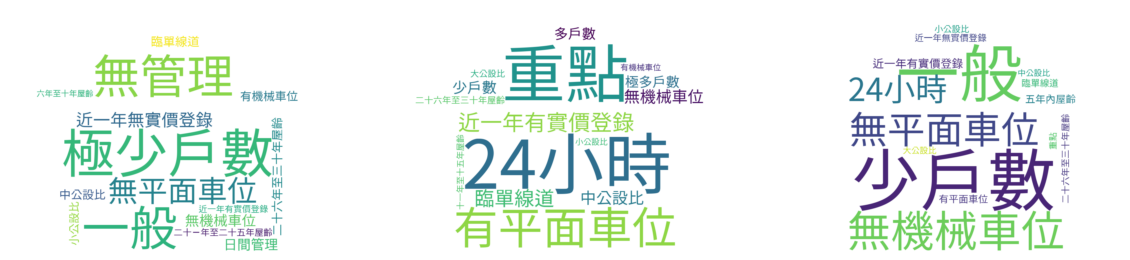

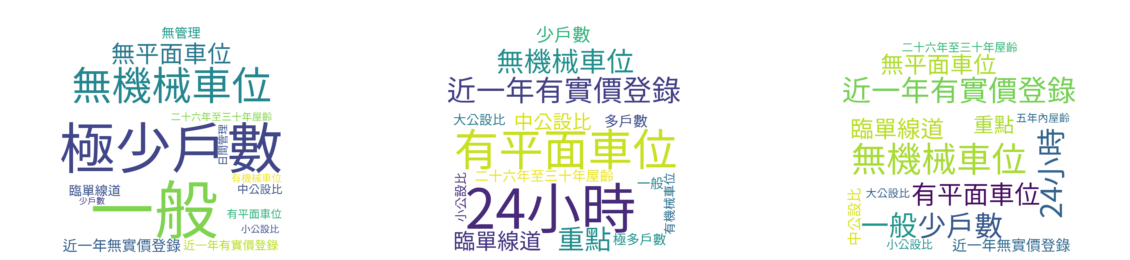

In [14]:
complete3_list = ['complete_3_1','complete_3_2','complete_3_3']

# Method 1
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_1, complete3_list)

# Method 2
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_2, complete3_list)

####4 clusters

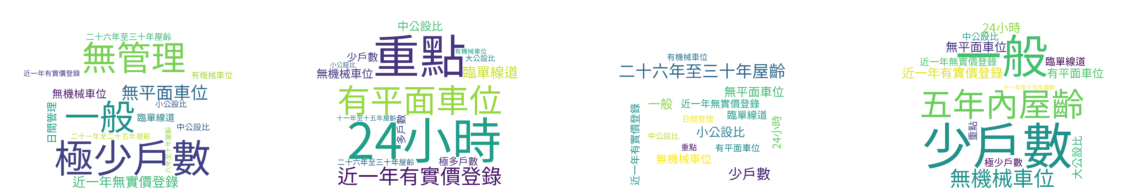

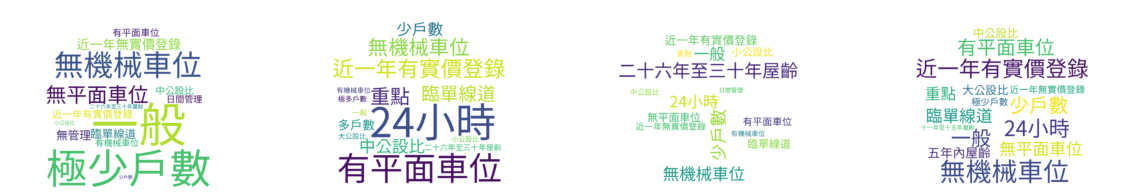

In [17]:
complete4_list = ['complete_4_1','complete_4_2','complete_4_3','complete_4_4']

# Method 1
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_1, complete4_list)

# Method 2
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_2, complete4_list)

###**3.2 Group Average Cluster**

####3 clusters

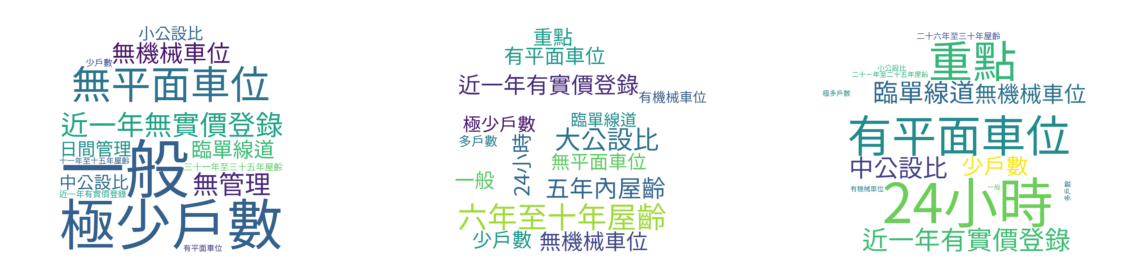

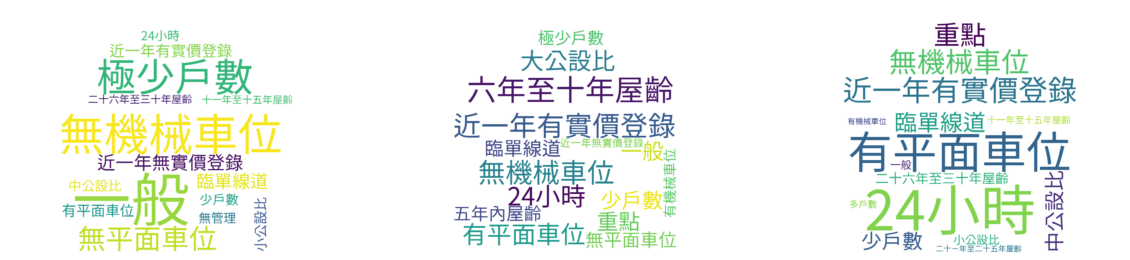

In [18]:
avg3_list = ['avg_3_1','avg_3_2','avg_3_3']

# Method 1
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_1, avg3_list)

# Method 2
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_2, avg3_list)

####4 clusters

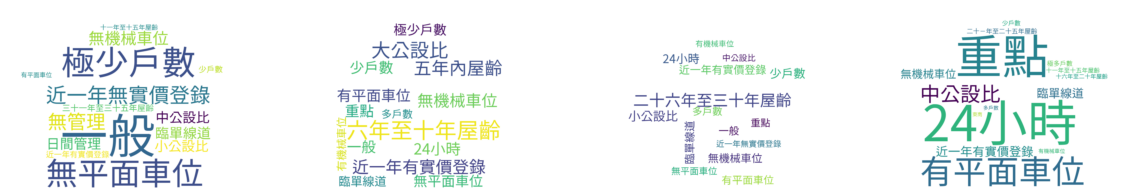

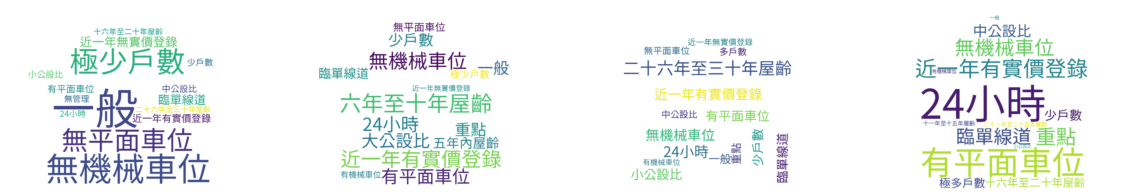

In [19]:
avg4_list = ['avg_4_1','avg_4_2','avg_4_3','avg_4_4']

# Method 1
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_1, avg4_list)

# Method 2
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_2, avg4_list)

###**3.3 Ward Cluster**

####3 clusters

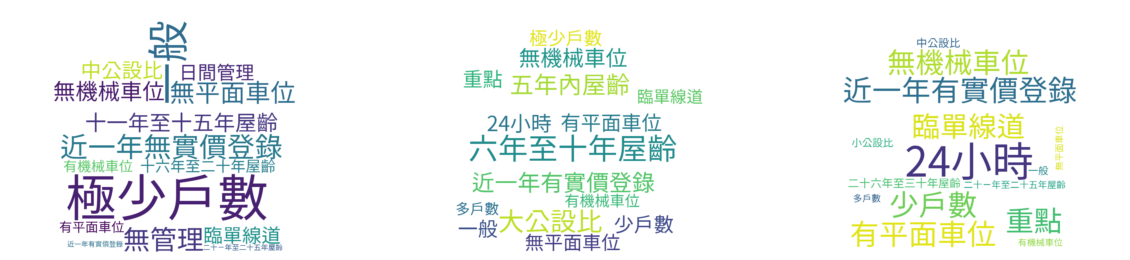

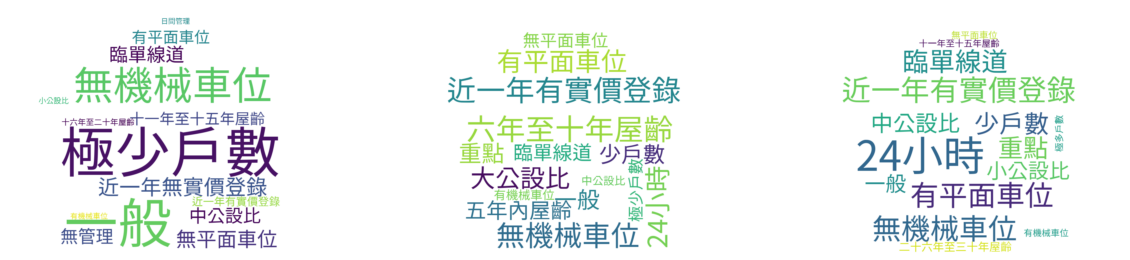

In [20]:
ward3_list = ['ward_3_1','ward_3_2','ward_3_3']

# Method 1
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_1, ward3_list)

# Method 2
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_2, ward3_list)

####4 clusters

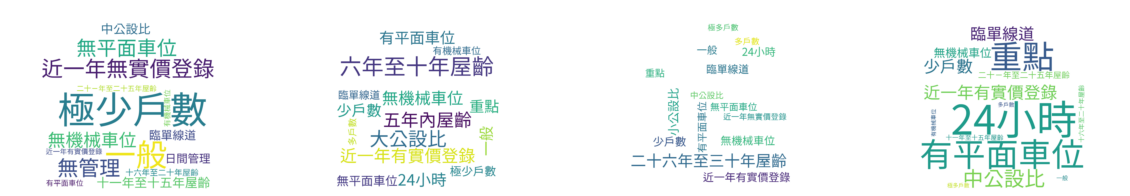

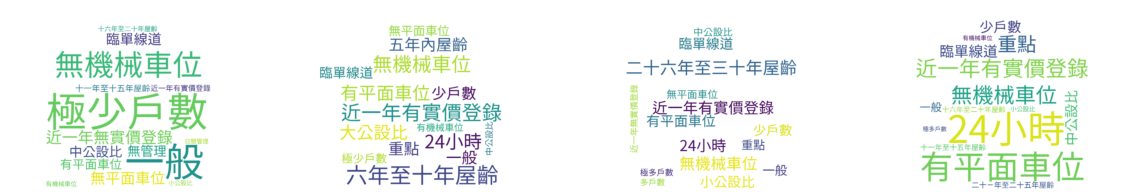

In [21]:
ward4_list = ['ward_4_1','ward_4_2','ward_4_3','ward_4_4']

# Method 1
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_1, ward4_list)

# Method 2
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_2, ward4_list)